In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from pypalettes import get_hex
from pypalettes import load_cmap
from highlight_text import fig_text, ax_text

In [2]:
def arrow_inflexion(
   ax,
   start, end,
   angleA, angleB,
   radius=0,
   color="black",
   transform=None
):

   # get the coordinates
   x1, y1 = end
   x2, y2 = start

   # avoid division by zero
   epsilon = 1e-6
   if x2 == x1:
      x2 += epsilon
   if y2 == y1:
      y2 += epsilon

   # select right coordinates
   if transform is None:
      transform = ax.transData

   # add the arrow
   connectionstyle = f"angle,angleA={angleA},angleB={angleB},rad={radius}"
   ax.annotate(
      "",
      xy=(x1, y1), xycoords=transform,
      xytext=(x2, y2), textcoords=transform,
      arrowprops=dict(
         color=color, arrowstyle="->",
         shrinkA=5, shrinkB=5,
         patchA=None, patchB=None,
         connectionstyle=connectionstyle,
      ),
   )

In [3]:
# df = pd.read_csv('world_primary.csv')
export_russia = pd.read_csv('counter.csv')
export_russia.tail()

pricing_scenario version pricing_scenario_name        date   variable  \
959          default      v2    USD60/bbl (actual)  30/08/2024  value_eur   
960          default      v2    USD60/bbl (actual)  31/08/2024  value_eur   
961          default      v2    USD60/bbl (actual)  01/09/2024  value_eur   
962          default      v2    USD60/bbl (actual)  02/09/2024  value_eur   
963          default      v2    USD60/bbl (actual)  03/09/2024  value_eur   

       Crude oil  Oil products and chemicals  Pipeline gas         Coal  \
959  266759915.5                 225270360.2   74008750.27  65075360.15   
960  279073580.9                 226314044.6   74354186.27  66564005.59   
961  268631613.7                 218125489.7   74530295.19  67137216.64   
962  271307741.2                 215009285.0   74767354.86  65371469.82   
963  274965895.9                 218807579.9   74963276.71  65663452.72   

             LNG  Crude oil qty  Oil products and chemicals qty  \
959  31797452.21      579192.68                       338768.93   
960  29675442.93      607428.57                       342621.23   
961  38280452.17      581903.90                       328735.34   
962  38901778.99      589109.00                       323771.92   
963  34449032.42      598030.02                       329851.36   

     Pipeline gas qty   Coal qty   LNG qty  
959         177599.94  440751.79  70933.36  
960         177996.36  450637.07  66335.55  
961         178143.63  455933.43  85380.72  
962         178417.69  443116.71  86196.72  
963         178614.22  444559.50  76355.09

In [4]:
print(export_russia)

    pricing_scenario version pricing_scenario_name        date   variable  \
0            default      v2    USD60/bbl (actual)  14/01/2022  value_eur   
1            default      v2    USD60/bbl (actual)  15/01/2022  value_eur   
2            default      v2    USD60/bbl (actual)  16/01/2022  value_eur   
3            default      v2    USD60/bbl (actual)  17/01/2022  value_eur   
4            default      v2    USD60/bbl (actual)  18/01/2022  value_eur   
..               ...     ...                   ...         ...        ...   
959          default      v2    USD60/bbl (actual)  30/08/2024  value_eur   
960          default      v2    USD60/bbl (actual)  31/08/2024  value_eur   
961          default      v2    USD60/bbl (actual)  01/09/2024  value_eur   
962          default      v2    USD60/bbl (actual)  02/09/2024  value_eur   
963          default      v2    USD60/bbl (actual)  03/09/2024  value_eur   

       Crude oil  Oil products and chemicals  Pipeline gas         Coal  \


In [5]:
export_russia = export_russia.drop(columns=['pricing_scenario', 'pricing_scenario_name', 'version', 'variable'])
export_russia.head()

date    Crude oil  Oil products and chemicals  Pipeline gas  \
0  14/01/2022  367309529.4                 242130324.7   266305016.3   
1  15/01/2022  346750288.2                 232736461.3   264283871.8   
2  16/01/2022  350243595.3                 243244950.3   262801112.6   
3  17/01/2022  346322648.9                 238817533.5   262332785.3   
4  18/01/2022  337218737.8                 243148303.6   261405553.3   

          Coal          LNG  Crude oil qty  Oil products and chemicals qty  \
0  52760597.19  100919265.7      760461.01                       398207.69   
1  52818988.01  111022507.6      715961.83                       383756.91   
2  55292807.77  107939375.3      718552.96                       396420.83   
3  53684222.27   99134448.8      707307.31                       389294.88   
4  51765705.24  102648512.8      685625.43                       402726.04   

   Pipeline gas qty   Coal qty    LNG qty  
0         266574.55  425201.35  106270.23  
1         265740.49  426824.42  116122.60  
2         265471.87  446861.28  111582.49  
3         266110.97  433671.57  101832.35  
4         266562.46  416924.28  102410.44

In [6]:
export_russia.dropna(inplace=True)
print(export_russia)

           date    Crude oil  Oil products and chemicals  Pipeline gas  \
0    14/01/2022  367309529.4                 242130324.7  2.663050e+08   
1    15/01/2022  346750288.2                 232736461.3  2.642839e+08   
2    16/01/2022  350243595.3                 243244950.3  2.628011e+08   
3    17/01/2022  346322648.9                 238817533.5  2.623328e+08   
4    18/01/2022  337218737.8                 243148303.6  2.614056e+08   
..          ...          ...                         ...           ...   
959  30/08/2024  266759915.5                 225270360.2  7.400875e+07   
960  31/08/2024  279073580.9                 226314044.6  7.435419e+07   
961  01/09/2024  268631613.7                 218125489.7  7.453030e+07   
962  02/09/2024  271307741.2                 215009285.0  7.476735e+07   
963  03/09/2024  274965895.9                 218807579.9  7.496328e+07   

            Coal           LNG  Crude oil qty  Oil products and chemicals qty  \
0    52760597.19  1.009193e+08

In [7]:
export_russia = export_russia.set_index('date')
print(export_russia)

              Crude oil  Oil products and chemicals  Pipeline gas  \
date                                                                
14/01/2022  367309529.4                 242130324.7  2.663050e+08   
15/01/2022  346750288.2                 232736461.3  2.642839e+08   
16/01/2022  350243595.3                 243244950.3  2.628011e+08   
17/01/2022  346322648.9                 238817533.5  2.623328e+08   
18/01/2022  337218737.8                 243148303.6  2.614056e+08   
...                 ...                         ...           ...   
30/08/2024  266759915.5                 225270360.2  7.400875e+07   
31/08/2024  279073580.9                 226314044.6  7.435419e+07   
01/09/2024  268631613.7                 218125489.7  7.453030e+07   
02/09/2024  271307741.2                 215009285.0  7.476735e+07   
03/09/2024  274965895.9                 218807579.9  7.496328e+07   

                   Coal           LNG  Crude oil qty  \
date                                          

In [8]:
export_russia.index = pd.to_datetime(export_russia.index)
export_russia.head()

/var/folders/l1/zg_j2m5n18lgrrvdp4ng1sz80000gn/T/ipykernel_41948/3311884629.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  export_russia.index = pd.to_datetime(export_russia.index)


Crude oil  Oil products and chemicals  Pipeline gas  \
date                                                                
2022-01-14  367309529.4                 242130324.7   266305016.3   
2022-01-15  346750288.2                 232736461.3   264283871.8   
2022-01-16  350243595.3                 243244950.3   262801112.6   
2022-01-17  346322648.9                 238817533.5   262332785.3   
2022-01-18  337218737.8                 243148303.6   261405553.3   

                   Coal          LNG  Crude oil qty  \
date                                                  
2022-01-14  52760597.19  100919265.7      760461.01   
2022-01-15  52818988.01  111022507.6      715961.83   
2022-01-16  55292807.77  107939375.3      718552.96   
2022-01-17  53684222.27   99134448.8      707307.31   
2022-01-18  51765705.24  102648512.8      685625.43   

            Oil products and chemicals qty  Pipeline gas qty   Coal qty  \
date                                                                      
2022-01-14                       398207.69         266574.55  425201.35   
2022-01-15                       383756.91         265740.49  426824.42   
2022-01-16                       396420.83         265471.87  446861.28   
2022-01-17                       389294.88         266110.97  433671.57   
2022-01-18                       402726.04         266562.46  416924.28   

              LNG qty  
date                   
2022-01-14  106270.23  
2022-01-15  116122.60  
2022-01-16  111582.49  
2022-01-17  101832.35  
2022-01-18  102410.44

In [9]:
# Filtering export_russia to only include the quantity columns
qty_columns = ['Crude oil qty', 'Oil products and chemicals qty', 'Pipeline gas qty', 'Coal qty', 'LNG qty']
export_russia.astype('float').dtypes
export_russia[qty_columns] = export_russia[qty_columns] / 1000
export_russia_qty = export_russia[qty_columns]


In [10]:
print(export_russia_qty)

            Crude oil qty  Oil products and chemicals qty  Pipeline gas qty  \
date                                                                          
2022-01-14      760.46101                       398.20769         266.57455   
2022-01-15      715.96183                       383.75691         265.74049   
2022-01-16      718.55296                       396.42083         265.47187   
2022-01-17      707.30731                       389.29488         266.11097   
2022-01-18      685.62543                       402.72604         266.56246   
...                   ...                             ...               ...   
2024-08-30      579.19268                       338.76893         177.59994   
2024-08-31      607.42857                       342.62123         177.99636   
2024-09-01      581.90390                       328.73534         178.14363   
2024-09-02      589.10900                       323.77192         178.41769   
2024-09-03      598.03002                       329.

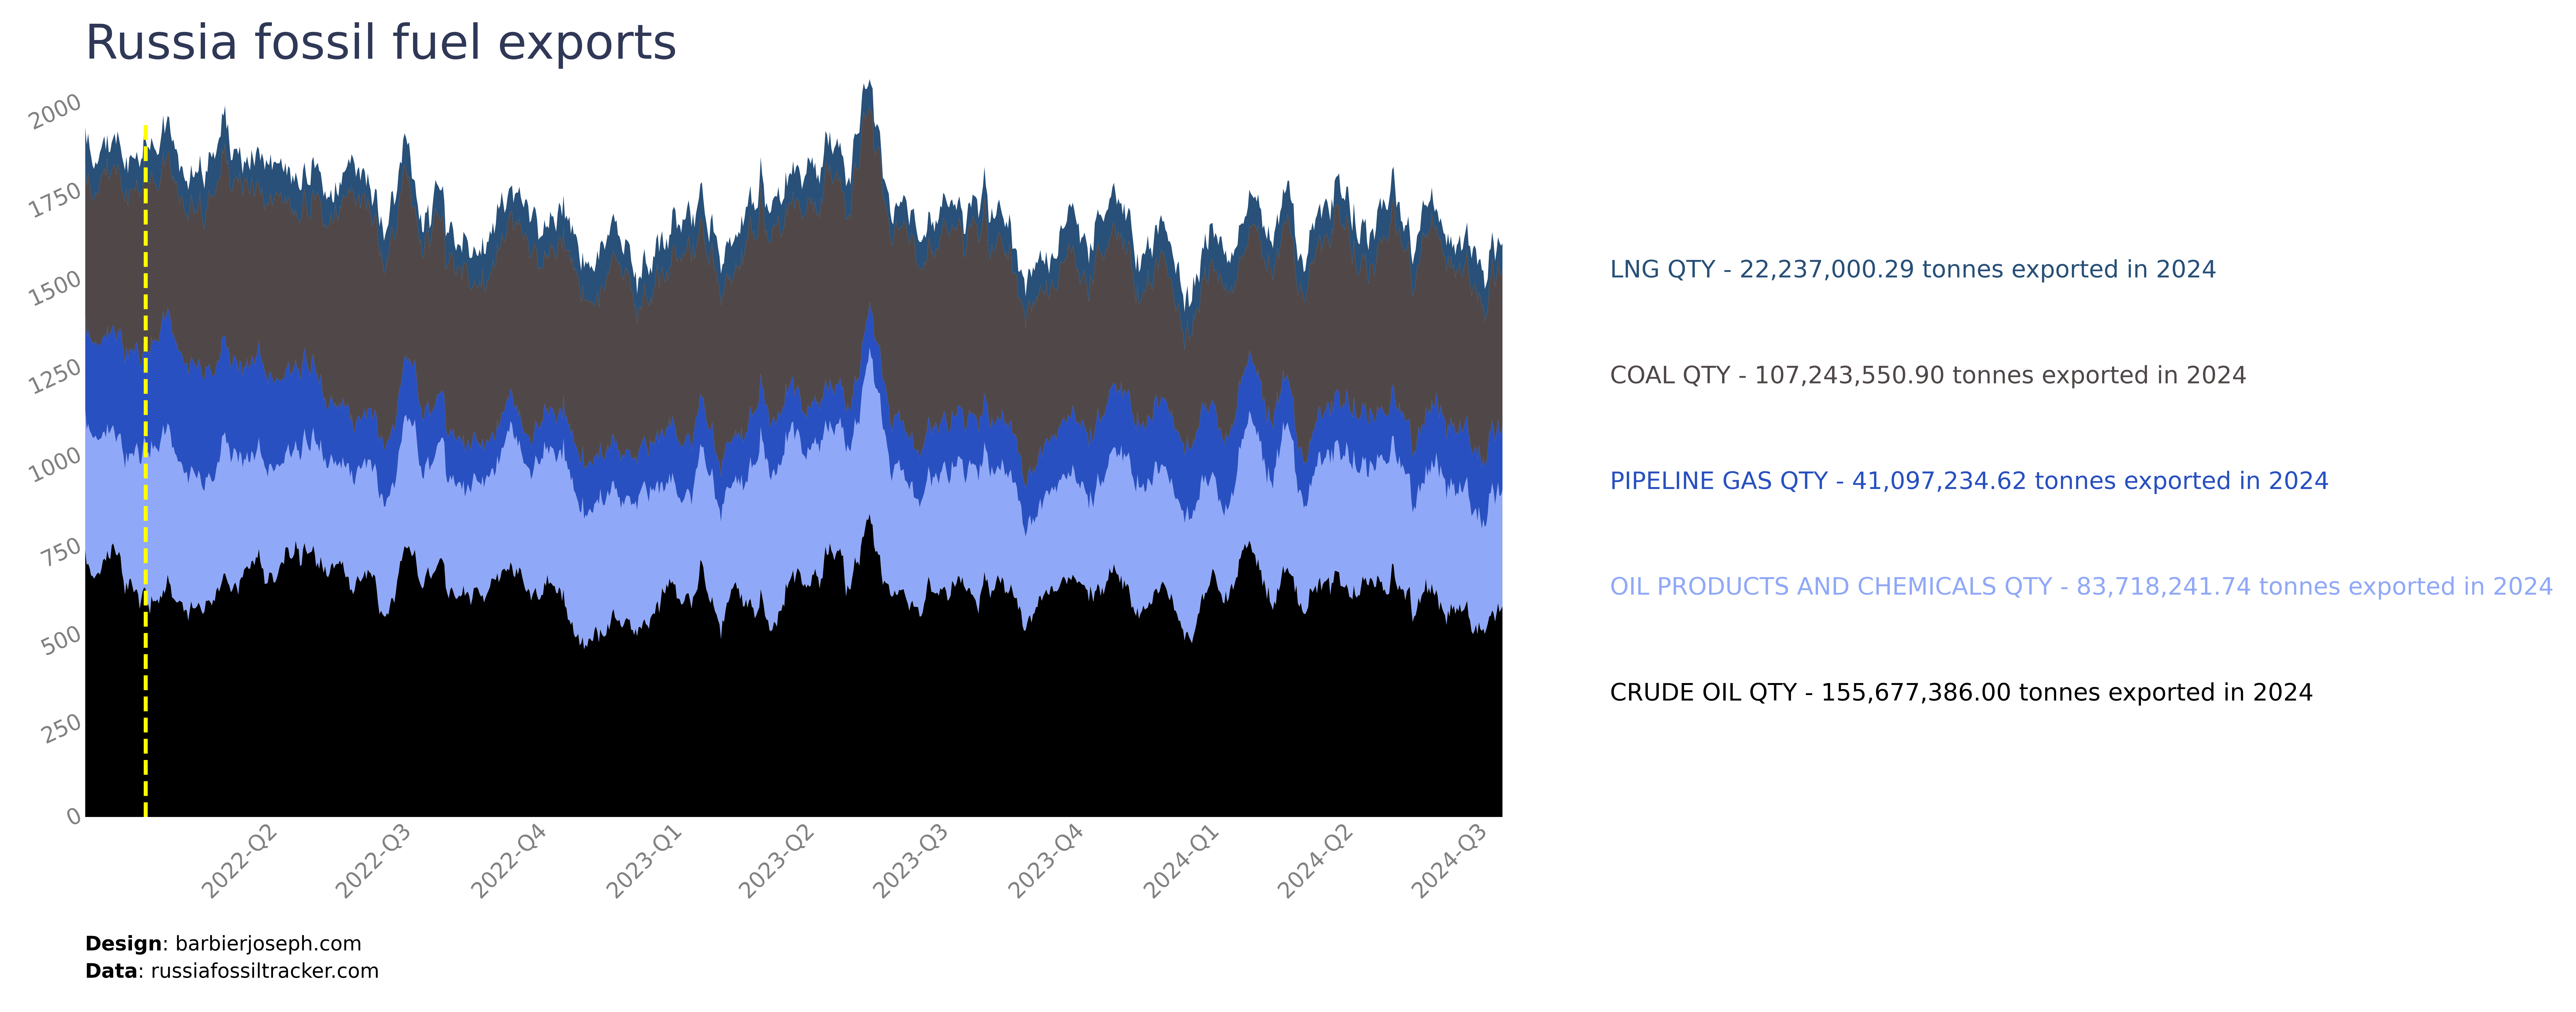

In [11]:
# Initialize the figure with larger size and moderate DPI
fig, ax = plt.subplots(figsize=(14, 7), dpi=600)  # Increased figure size and adjusted DPI
ax.set_axis_off()

# Use the existing DatetimeIndex
x = export_russia_qty.index  # Assuming this is already a DatetimeIndex

# defines color map and mapping with columns
colors = get_hex('wailord')
color_mapping = {
   'Crude oil qty': colors[12],
   'Oil products and chemicals qty': colors[10],
   'Pipeline gas qty': colors[3],
   'Coal qty': colors[11],
   'LNG qty': colors[9]
}
colors = [color_mapping[col] for col in export_russia_qty]


# Correct the shape mismatch by transposing the data if needed
areas = export_russia_qty.values.T  # Transposing if needed to match the shape

# Create the stacked area plot
ax.stackplot(x, areas, colors=colors)

# Add customized labels for x-axis (quarterly)
for year in range(x.min().year, x.max().year + 1):
    for month in [1, 4, 7, 10]:  # Quarterly months
        quarter_date = pd.Timestamp(year, month, 1)
        if quarter_date in x:
            quarter = (month - 1) // 3 + 1
            ax_text(
                x=quarter_date, y=-5,  # Adjust the y-value to place the label just below the plot
                s=f"{year}-Q{quarter}",  # Bold label with formatted text
                ha='left', va='top', color='gray', fontsize=11, rotation=45
            )

# Add customized labels for y-axis
max_value = export_russia_qty.sum(axis=1).max()
for value in range(0, int(max_value) + 100, 250):
    ax_text(
        x=x.min(), y=value,  # Adjust the x-value to place the label to the left of the plot
        s=f'{value}',
        ha='right', va='center', color='gray', fontsize=11, rotation=25
    )

# Add title
fig_text (
    s='Russia fossil fuel exports',
    x=.16, y=.90, fontsize=24,
    ha='left', va='top', color='#303857',
    fig=fig
)

# source and credit
text = """
<Design>: barbierjoseph.com
<Data>: russiafossiltracker.com
"""
fig_text(
   s=text, x=.16, y=.001,
   fontsize=10, ha='left', va='top',
   color='black', highlight_textprops=[{"fontweight": 'bold'}, {"fontweight": 'bold'}]
)

# Add inline labels
y_pos = [1550, 1250, 950, 650, 350]
for i in range(len(y_pos)):
    
    # Get the column name based on the reverse order
    column_name = export_russia_qty.columns[::-1][i]
    
    # Filter for rows in the year 2024
    export_russia_qty_2024 = export_russia_qty[export_russia_qty.index.year == 2024]
    
    # Sum the values for the 2024 data for the given column
    val_2024 = export_russia_qty_2024[column_name].sum()
    ax_text(
        x=pd.Timestamp("2024-11-15"),
        y=y_pos[i],
        s=f"{column_name.upper()} - {val_2024*1000:,.2f} tonnes exported in 2024",
        va='center', ha='left', fontsize=12,
        color=colors[len(colors) - 1 -i]
    )
    



# add inflexion arrows
x_axis_start = int(x.max().strftime('%Y%m%d'))
x_axis_end = int(pd.Timestamp("2024-11-15").strftime('%Y%m%d'))
radius = 10
# arrow_inflexion(ax, end=(x_axis_end, 350), start=(x_axis_start, 350), angleA=180 ,angleB=90, radius=radius)
# arrow_inflexion(ax, end=(x_axis_end, 220), start=(x_axis_start, 220), angleA=180 ,angleB=90, radius=radius)
# arrow_inflexion(ax, end=(x_axis_end, 180), start=(x_axis_start, 90), angleA=50, angleB=180, radius=radius)
# arrow_inflexion(ax, end=(x_axis_end, 100), start=(x_axis_start, 60), angleA=50, angleB=180, radius=radius)
# arrow_inflexion(ax, end=(x_axis_end, 70), start=(x_axis_start, 45), angleA=50, angleB=180, radius=radius)





# Add yellow dotted line
event_date = pd.Timestamp("2022-02-24")
ax.axvline(x=event_date, color='yellow', linestyle='--', linewidth=2, ymax=0.9)

# Display the plot
plt.show()

In [12]:
# Filtering export_russia to only include the value columns
val_columns = ['Crude oil', 'Oil products and chemicals', 'Pipeline gas', 'Coal', 'LNG']
# export_russia.astype('float').dtypes
export_russia[val_columns] = export_russia[val_columns] / 1000000
export_russia_val = export_russia[val_columns]

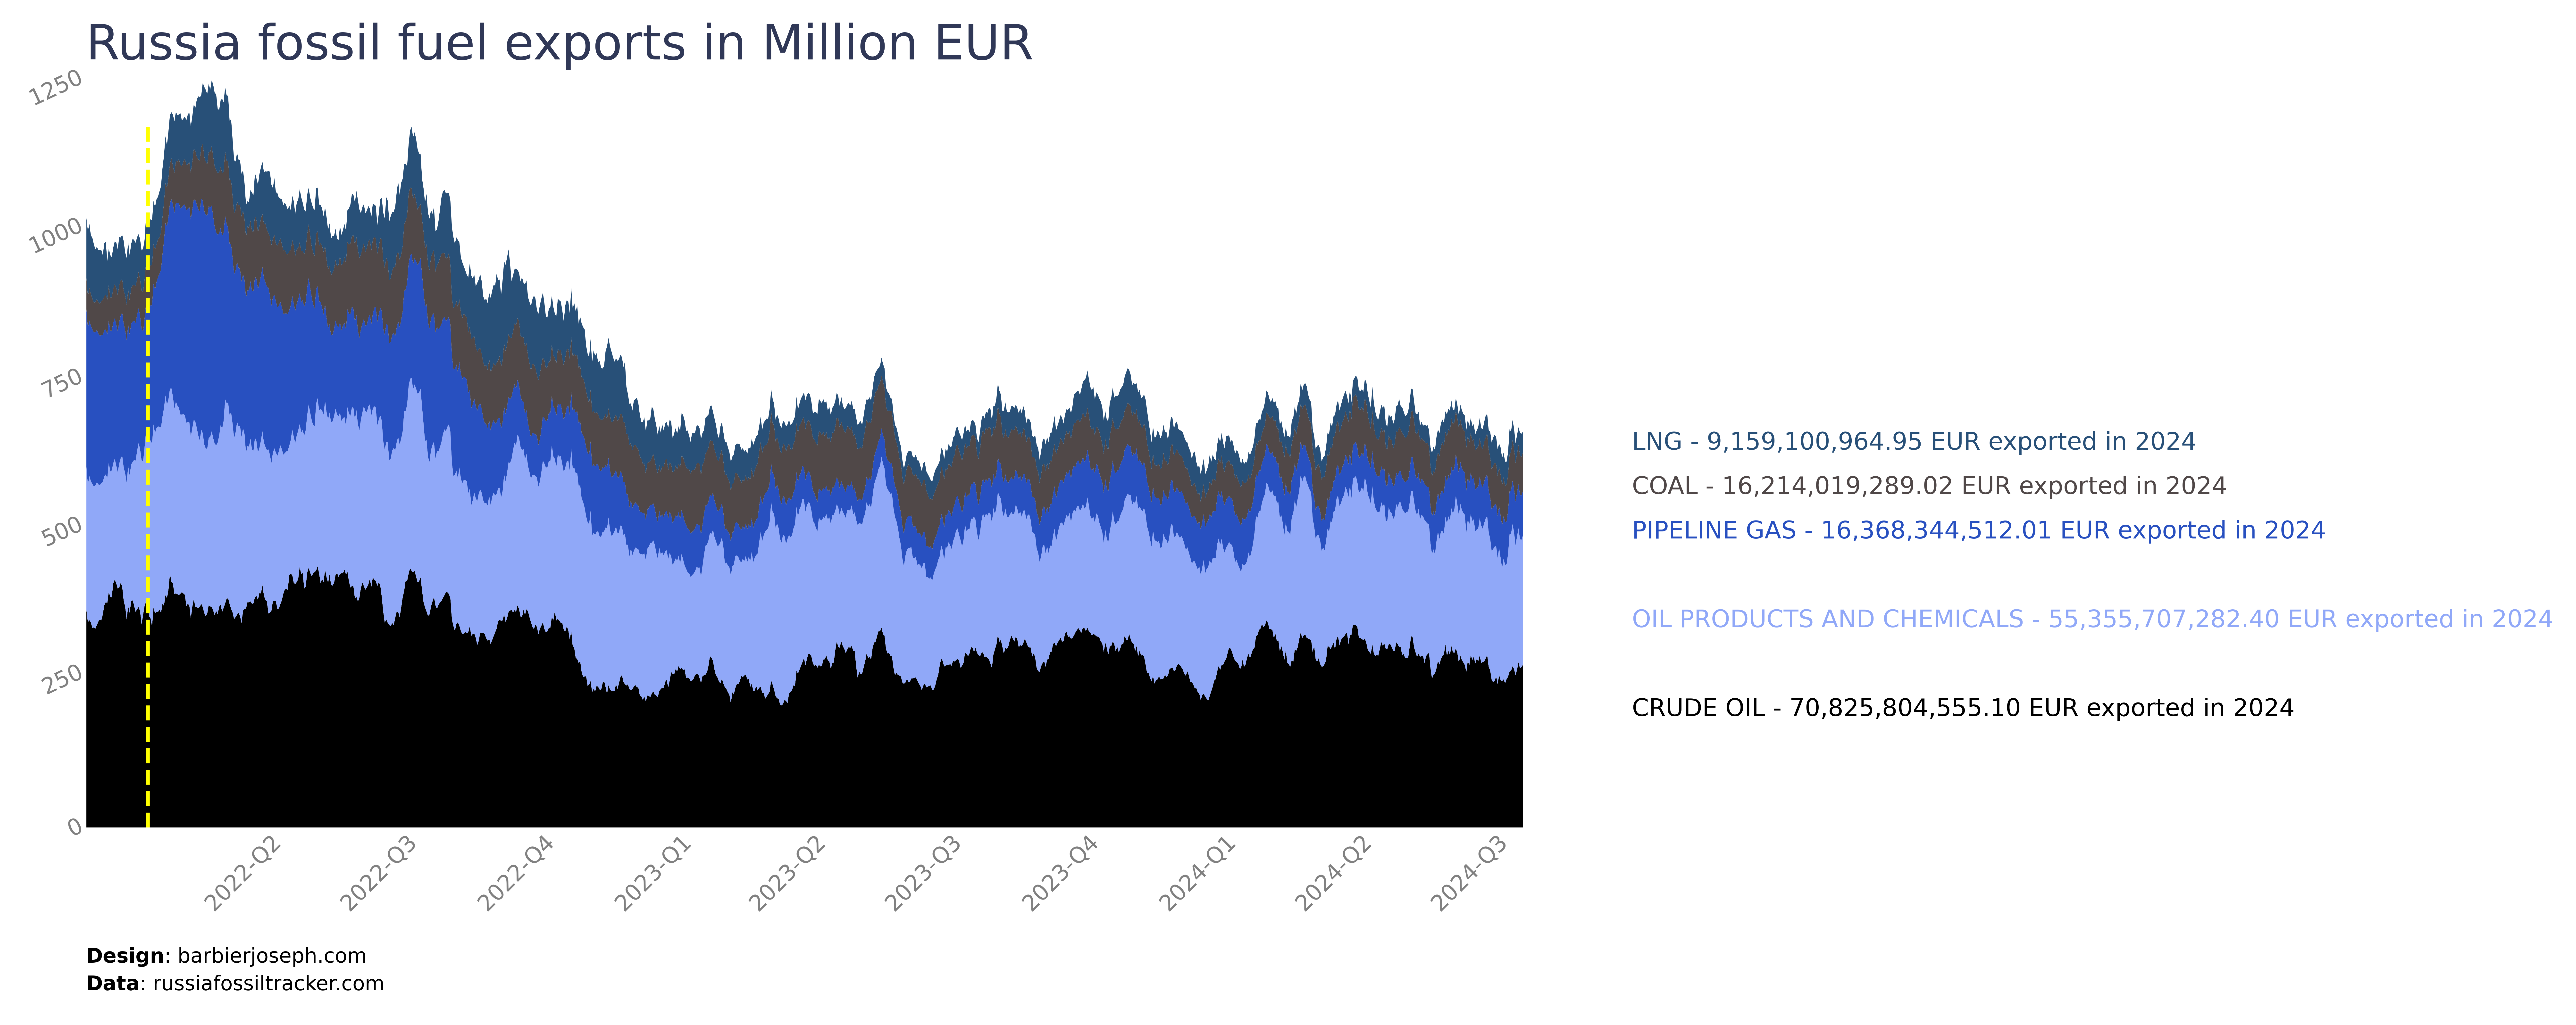

In [13]:
# Initialize the figure with larger size and moderate DPI
fig, ax = plt.subplots(figsize=(14, 7), dpi=600)  # Increased figure size and adjusted DPI
ax.set_axis_off()

# Use the existing DatetimeIndex
x = export_russia_val.index  # Assuming this is already a DatetimeIndex

# defines color map and mapping with columns
colors = get_hex('wailord')
color_mapping = {
   'Crude oil': colors[12],
   'Oil products and chemicals': colors[10],
   'Pipeline gas': colors[3],
   'Coal': colors[11],
   'LNG': colors[9]
}
colors = [color_mapping[col] for col in export_russia_val]


# Correct the shape mismatch by transposing the data if needed
areas = export_russia_val.values.T  # Transposing if needed to match the shape

# Create the stacked area plot
ax.stackplot(x, areas, colors=colors)

# Add customized labels for x-axis (quarterly)
for year in range(x.min().year, x.max().year + 1):
    for month in [1, 4, 7, 10]:  # Quarterly months
        quarter_date = pd.Timestamp(year, month, 1)
        if quarter_date in x:
            quarter = (month - 1) // 3 + 1
            ax_text(
                x=quarter_date, y=-5,  # Adjust the y-value to place the label just below the plot
                s=f"{year}-Q{quarter}",  # Bold label with formatted text
                ha='left', va='top', color='gray', fontsize=11, rotation=45
            )

# Add customized labels for y-axis
max_value = export_russia_val.sum(axis=1).max()
for value in range(0, int(max_value) + 100, 250):
    ax_text(
        x=x.min(), y=value,  # Adjust the x-value to place the label to the left of the plot
        s=f'{value}',
        ha='right', va='center', color='gray', fontsize=11, rotation=25
    )

# Add title
fig_text (
    s='Russia fossil fuel exports in Million EUR',
    x=.16, y=.90, fontsize=24,
    ha='left', va='top', color='#303857',
    fig=fig
)

# source and credit
text = """
<Design>: barbierjoseph.com
<Data>: russiafossiltracker.com
"""
fig_text(
   s=text, x=.16, y=.001,
   fontsize=10, ha='left', va='top',
   color='black', highlight_textprops=[{"fontweight": 'bold'}, {"fontweight": 'bold'}]
)

# Add inline labels
y_pos = [650, 575, 500, 350, 200]
for i in range(len(y_pos)):
    
    # Get the column name based on the reverse order
    column_name = export_russia_val.columns[::-1][i]
    
    # Filter for rows in the year 2024
    export_russia_val_2024 = export_russia_val[export_russia_val.index.year == 2024]
    
    # Sum the values for the 2024 data for the given column
    val_2024 = export_russia_val_2024[column_name].sum()
    ax_text(
        x=pd.Timestamp("2024-11-15"),
        y=y_pos[i],
        s=f"{column_name.upper()} - {val_2024*1000000:,.2f} EUR exported in 2024",
        va='center', ha='left', fontsize=12,
        color=colors[len(colors) - 1 -i]
    )


# Add yellow dotted line
event_date = pd.Timestamp("2022-02-24")
ax.axvline(x=event_date, color='yellow', linestyle='--', linewidth=2, ymax=0.9)

# Display the plot
plt.show()